In [2]:
#read first 10 rows of document
with open("transfusion.data") as f:
    for _ in range(10): # first 10 lines
        print(f.readline()) 

Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),"whether he/she donated blood in March 2007"

2 ,50,12500,98 ,1

0 ,13,3250,28 ,1

1 ,16,4000,35 ,1

2 ,20,5000,45 ,1

1 ,24,6000,77 ,0

4 ,4,1000,4 ,0

2 ,7,1750,14 ,1

1 ,12,3000,35 ,0

2 ,9,2250,22 ,1



In [3]:
#imort data to program
import pandas as pd

transfusion = pd.read_csv("transfusion.data")

transfusion.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
#Data types in columns
transfusion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
transfusion.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [6]:
#Renaming
transfusion.rename(
    columns={'whether he/she donated blood in March 2007': 'aim'},
    inplace=True
)

# Print out the first 2 rows
transfusion.head(2)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),aim
0,2,50,12500,98,1
1,0,13,3250,28,1


In [7]:
transfusion.aim.value_counts(normalize=True).round(3)

0    0.762
1    0.238
Name: aim, dtype: float64

In [8]:
mini = transfusion['Time (months)'].min()
maxi = transfusion['Time (months)'].max()

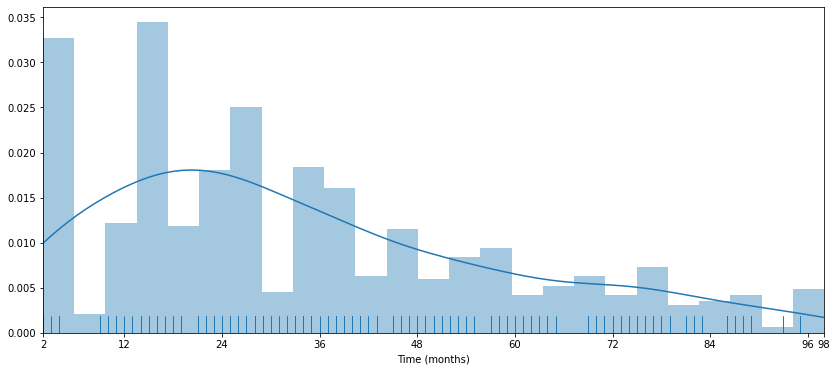

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.xlim(mini,maxi)
plt.xticks([mini,12,24,36,48,60,72,84,96,maxi])
sns.distplot(transfusion['Time (months)'],bins=25,rug=True)

In [10]:
transfusion['Frequency (times)'].value_counts().sort_values(ascending=False).head(15)

1     158
2     112
3      87
4      62
5      62
6      52
7      43
8      31
9      24
11     22
10     14
12     14
16     13
14     13
13      9
Name: Frequency (times), dtype: int64

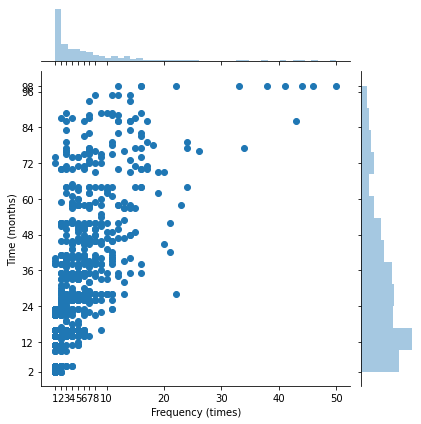

In [11]:
j = sns.jointplot(x='Frequency (times)',y='Time (months)',data=transfusion)
j.ax_joint.set_xticks([1,2,3,4,5,6,7,8,10,20,30,40,50])
j.ax_joint.set_yticks([mini,12,24,36,48,60,72,84,96,maxi])

In [12]:
transfusion[(transfusion['Frequency (times)'] == 1) & (transfusion['Time (months)'] < 25)].count()

Recency (months)         152
Frequency (times)        152
Monetary (c.c. blood)    152
Time (months)            152
aim                      152
dtype: int64

In [13]:
transfusion[(transfusion['Frequency (times)'] > 1) & (transfusion['Time (months)'] < 25) ].count()

Recency (months)         164
Frequency (times)        164
Monetary (c.c. blood)    164
Time (months)            164
aim                      164
dtype: int64

In [14]:
transfusion[(transfusion['Frequency (times)'] > 1) & (transfusion['Time (months)'] < 25) & (transfusion['aim']==1)].count()

Recency (months)         53
Frequency (times)        53
Monetary (c.c. blood)    53
Time (months)            53
aim                      53
dtype: int64

In [15]:
transfusion[(transfusion['Frequency (times)'] > 7) & (transfusion['Time (months)'] < 25) ].count()

Recency (months)         5
Frequency (times)        5
Monetary (c.c. blood)    5
Time (months)            5
aim                      5
dtype: int64

In [16]:
transfusion[(transfusion['Frequency (times)'] > 7) & (transfusion['Time (months)'] < 25) & (transfusion['aim']==1)].count()

Recency (months)         1
Frequency (times)        1
Monetary (c.c. blood)    1
Time (months)            1
aim                      1
dtype: int64

In [17]:
transfusion[(transfusion['Recency (months)'] > 3) & (transfusion['aim']==1)].count()

Recency (months)         103
Frequency (times)        103
Monetary (c.c. blood)    103
Time (months)            103
aim                      103
dtype: int64

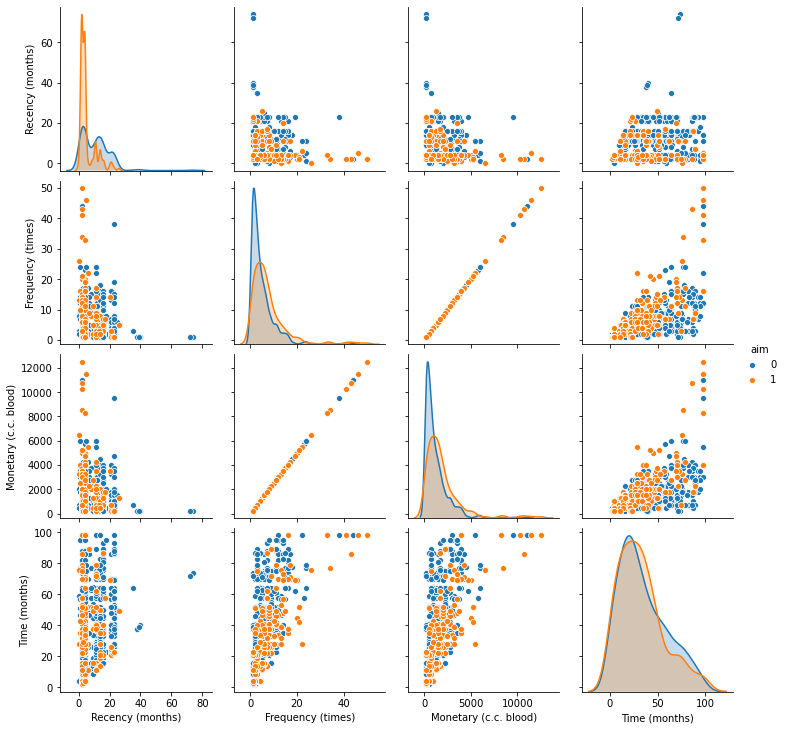

In [18]:
sns.pairplot(data=transfusion,hue='aim')

In [19]:
from sklearn.preprocessing import StandardScaler

data = transfusion[['Recency (months)', 'Frequency (times)', 'Time (months)']]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [20]:
import pandas as pd

scaled_data = pd.DataFrame(scaled_data)
scaled_data['aim'] = transfusion.iloc[:,4]

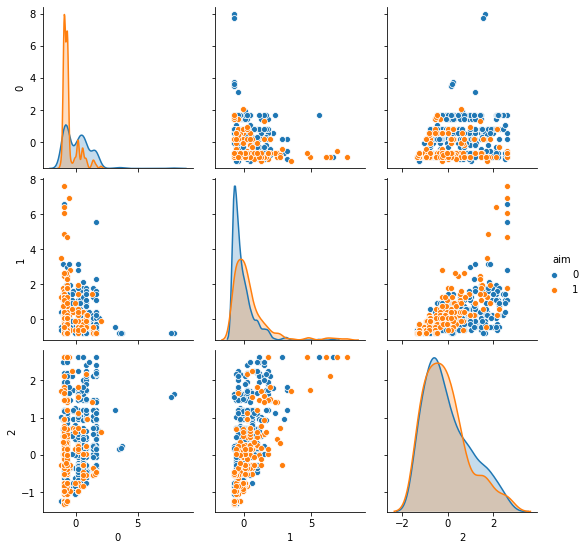

In [21]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

sb.pairplot(scaled_data, hue='aim')

In [22]:
scaled_data

,0,1,2,aim
0,-0.927899,7.623346,2.615633,1
1,-1.175118,1.282738,-0.257881,1
2,-1.051508,1.796842,0.029471,1
3,-0.927899,2.482313,0.439973,1
4,-1.051508,3.167784,1.753579,0
...,...,...,...,...
743,1.667904,-0.602307,0.152621,0
744,1.420685,-0.602307,0.727324,0
745,1.667904,-0.430940,1.137826,0
746,3.645659,-0.773675,0.193671,0


In [23]:
scaled_data.describe()

,0,1,2,aim
count,7.480000e+02,7.480000e+02,7.480000e+02,748.000000
mean,3.562213e-16,1.095380e-16,7.421277e-18,0.237968
std,1.000669e+00,1.000669e+00,1.000669e+00,0.426124
min,-1.175118e+00,-7.736751e-01,-1.325186e+00,0.000000
25%,-8.351915e-01,-6.023074e-01,-7.504834e-01,0.000000
50%,-3.098504e-01,-2.595718e-01,-2.578809e-01,0.000000
75%,5.554172e-01,2.545316e-01,6.452236e-01,0.000000
max,7.971997e+00,7.623346e+00,2.615633e+00,1.000000


In [24]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    scaled_data.drop(columns='aim'),
    scaled_data.aim,
    test_size=0.25,
    random_state=545
)

data_train.head(2)

,0,1,2
224,-0.680679,-0.773675,-1.243086
718,1.420685,-0.430940,0.029471


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

from keras.layers import Dropout

#set seed for reproduction purpose
from numpy.random import seed
seed(1) 

import tensorflow
tensorflow.random.set_seed(1234)

import random as rn
rn.seed(12345)

#import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

#def neuralModel(i, neurons, activation, dropout, optimizer):
 #   neural_model = Sequential()
  #  neural_model.add(Dense(neurons[0], input_shape=(3,), activation=activation[0]))
   # neural_model.add(Dropout(dropout[0]))
    #for n in range(1, i):
     #   neural_model.add(Dense(neurons[n], activation=activation[n]))
    #    neural_model.add(Dropout(dropout[i]))
    #neural_model.add(Dense(1, activation="sigmoid"))
    #neural_model.compile(optimizer=optimizer, loss="binary_crossentropy", \
    #                 metrics=["accuracy"])
    #return neural_model


In [26]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#model = KerasClassifier(build_fn=neuralModel, epochs=200, verbose=False)
#param_grid = {
#    'i': [2],
#    'neurons': [(50,25,10), (20,10,5), (25, 15, 10), (10, 10, 10), (100, 50, 25)],
#    'activation': [("relu", "relu", "relu"), ("selu", "relu", "tanh"), ("tanh", "relu", "selu"), ("selu", "tanh", "relu")],
#    'dropout': [(0.1, 0.1, 0.1), (0.2, 0.2, 0.2), (0.3, 0.2, 0.1), (0.1, 0.2, 0.1), (0.1, 0.2, 0.3)],
#    'optimizer': ['SGD', 'RMSproup', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
#}


#all_accuracies = cross_val_score(estimator=model, X=data_train, y=target_train, cv=5)

#grid = GridSearchCV(estimator=model, param_grid=param_grid, verbose=1, return_train_score=True, n_jobs=2)
#grid_result = grid.fit(data_train, target_train)

#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
#    print("%f (%f) with: %r" % (mean, stdev, param))

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

from keras.layers import Dropout

#set seed for reproduction purpose
from numpy.random import seed
seed(1) 

import random as rn
rn.seed(12345)


#import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

out_model = Sequential()
out_model.add(Dense(10, input_shape=(3,), activation="relu"))
out_model.add(Dropout(0.1))
out_model.add(Dense(10, activation="relu"))
out_model.add(Dropout(0.2))
out_model.add(Dense(10, activation="relu"))
out_model.add(Dropout(0.1))
out_model.add(Dense(1, activation="sigmoid"))

out_model.compile(optimizer="adam", loss="binary_crossentropy", \
                 metrics=["accuracy"])

In [28]:
run_hist = out_model.fit(data_train, target_train, epochs=200,\
                                              validation_data=(data_test, target_test),\
                                              verbose=False, shuffle=False)
print('Accuracy training: %s, testing: %s' % ( \
      accuracy_score(target_train, out_model.predict_classes(data_train)), \
      accuracy_score(target_test, out_model.predict_classes(data_test))))

C:\Users\Benio\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Accuracy training: 0.8199643493761141, testing: 0.7754010695187166


C:\Users\Benio\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


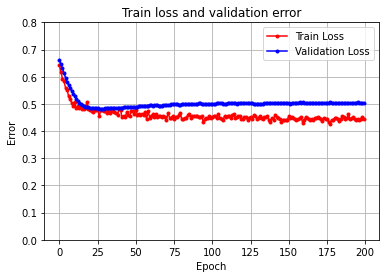

In [29]:
plt.plot(run_hist.history["loss"],'r', marker='.', label="Train Loss")
plt.plot(run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
axes = plt.gca()
axes.set_ylim([0,0.8])
plt.title("Train loss and validation error")
plt.legend()
plt.xlabel('Epoch'), plt.ylabel('Error')
plt.grid()

In [88]:
tensorflow.get_logger().setLevel('ERROR')
import random
class Individual:
    def __init__(self):
        self.layers = []
        self.act_fun = []

class GA:
    def __init__(self, neuron_number, hidden_layers):
        self.neuron_number = neuron_number
        self.hidden_layers = hidden_layers
        self.act_functions = ['relu', 'selu', 'tanh', 'sigmoid']
        self.population = []
        self.create_population()
    
    def fitness(self, individual):
        score = []
        out_model = Sequential()
        out_model.add(Dense(max(individual.layers), input_shape=(3,), activation="relu"))
        for i in range(0, len(individual.layers)):
            out_model.add(Dense(individual.layers[i], activation=individual.act_fun[i]))
            out_model.add(Dropout(0.1))
        
        out_model.add(Dense(1, activation="sigmoid"))
        out_model.compile(optimizer="adam", loss="binary_crossentropy", \
                 metrics=["accuracy"])
        run_hist = out_model.fit(data_train, target_train, epochs=100,\
                                              validation_data=(data_test, target_test),\
                                              verbose=False, shuffle=False)
        print('Accuracy training: %s, testing: %s' % ( \
        accuracy_score(target_train, out_model.predict_classes(data_train)), \
        accuracy_score(target_test, out_model.predict_classes(data_test))))
        
        avg = (accuracy_score(target_train, out_model.predict_classes(data_train)) +
      accuracy_score(target_test, out_model.predict_classes(data_test)))/2
        return avg
        
        
        
        
    def create_population(self):
        for _ in range(0, 10):
            individual = Individual()
            num_layers = random.randint(1, self.hidden_layers)
            for _ in range(0, num_layers):
                individual.layers.append(random.randint(0, self.neuron_number))
                individual.act_fun.append(self.act_functions[random.randint(0, 3)])
            self.population.append(individual)
    
    def crossover(self, individual1, individual2):
        pivot1 = random.randint(0, len(individual1.layers)-1)
        pivot2 = random.randint(0, len(individual2.layers)-1)
        
        if(pivot1 + (len(individual2.layers) - pivot2) > self.hidden_layers):
            layers_to_detach = pivot1 + (len(individual2.layers) - pivot2) - self.hidden_layers
            if(pivot1 > (len(individual2.layers) - pivot2)):
                pivot1 -= layers_to_detach
                pivot2 += layers_to_detach
            else: 
                pivot1 += layers_to_detach
                pivot2 -= layers_to_detach
        if(pivot2 + (len(individual1.layers) - pivot1) > self.hidden_layers):
            layers_to_detach = pivot2 + (len(individual1.layers) - pivot1) - self.hidden_layers
            if(pivot2 > (len(individual1.layers) - pivot1)):
                pivot1 += layers_to_detach
                pivot2 -= layers_to_detach
            else: 
                pivot1 -= layers_to_detach
                pivot2 += layers_to_detach
        
        tmp1 = individual1.layers[:pivot1] 
        tmp2 = individual2.layers[:pivot2]
        tmp3 = individual1.layers[pivot1:]
        tmp4 = individual2.layers[pivot2:]
        
        act_fun_tmp1 = individual1.act_fun[:pivot1]
        act_fun_tmp2 = individual2.act_fun[:pivot2]
        act_fun_tmp3 = individual1.act_fun[pivot1:]
        act_fun_tmp4 = individual2.act_fun[pivot2:]

        new_inds = []
        new_ind1 = Individual()
        new_ind2 = Individual()
        
        new_ind1.layers = tmp1 + tmp4
        new_ind2.layers = tmp2 + tmp3
        new_ind1.act_fun = act_fun_tmp1 + act_fun_tmp4
        new_ind2.act_fun = act_fun_tmp2 + act_fun_tmp3
        new_inds.append(new_ind1)
        new_inds.append(new_ind2)
        return new_inds
    
    def mutation(self, individual):
        print("Mutation ongoing!")
        random_layer = random.randint(0, len(individual.layers))
        random_neurons = random.randint(1, self.neuron_number)
        random_act_fun = random.randint(0, 3)
        individual.layers[random_layer] = random_neurons
        individual.act_fun[random_layer] = self.act_functions[random_act_fun]
        return individual
    
        
def sortFun(sortObj):
    return sortObj['score']
    
            
            
new_ga = GA(256, 10)
hist_avg_scores = []
for i in range(0, 20):
    scores = []
    print("population: ", str(i))
    for j in range(0, 10):
        print(str(new_ga.population[j].layers))
        print(str(new_ga.population[j].act_fun))
        scores.append({'num': str(j),'score': new_ga.fitness(new_ga.population[j])})
    scores.sort(reverse=True, key=sortFun)
    avg_scores = scores[0]['score'] + scores[1]['score'] + scores[2]['score'] + scores[3]['score'] + scores[4]['score'] + scores[5]['score'] + scores[6]['score'] + scores[7]['score'] + scores[8]['score'] + scores[9]['score']
    print(avg_scores)
    hist_avg_scores.append(avg_scores)
    print(str(hist_avg_scores))
    print(str(scores))
    if(i<9):
        new_ids = new_ga.crossover(new_ga.population[int(scores[0]['num'])], new_ga.population[int(scores[1]['num'])])
        new_ids2 = new_ga.crossover(new_ga.population[int(scores[2]['num'])], new_ga.population[int(scores[3]['num'])])
        pop_array = []
        pop_array.append(int(scores[9]['num']))
        pop_array.append(int(scores[8]['num']))
        pop_array.append(int(scores[7]['num']))
        pop_array.append(int(scores[6]['num']))
        pop_array.sort(reverse=True)

        new_weight_ga.population.pop(pop_array[0])
        new_weight_ga.population.pop(pop_array[1])
        new_weight_ga.population.pop(pop_array[2])
        new_weight_ga.population.pop(pop_array[3])
        new_ga.population += new_ids + new_ids2
        if(random.randint(0, 10) == 1):
            index = random.randint(0, 10)
            new_ga.population[index] = new_ga.mutation(new_ga.population[index])
        


population:  0
[249, 201]
['relu', 'relu']
Accuracy training: 0.8431372549019608, testing: 0.7272727272727273
[53, 232, 194, 6, 206]
['relu', 'relu', 'relu', 'tanh', 'sigmoid']
Accuracy training: 0.8467023172905526, testing: 0.7272727272727273
[123, 76, 243, 96, 32, 240, 1]
['selu', 'tanh', 'tanh', 'relu', 'selu', 'relu', 'selu']
Accuracy training: 0.8253119429590018, testing: 0.7486631016042781
[168, 4, 88, 52, 38, 50]
['relu', 'selu', 'tanh', 'tanh', 'tanh', 'tanh']
Accuracy training: 0.8538324420677362, testing: 0.7005347593582888
[10]
['relu']
Accuracy training: 0.8146167557932263, testing: 0.7540106951871658
[204, 15, 13, 227, 153]
['sigmoid', 'relu', 'relu', 'tanh', 'tanh']
Accuracy training: 0.8288770053475936, testing: 0.7540106951871658
[116, 231, 96]
['tanh', 'tanh', 'relu']
Accuracy training: 0.8306595365418895, testing: 0.732620320855615
[155, 34, 45, 205, 199, 160]
['selu', 'sigmoid', 'tanh', 'relu', 'sigmoid', 'tanh']
Accuracy training: 0.8288770053475936, testing: 0.7540

Accuracy training: 0.8467023172905526, testing: 0.7058823529411765
[53, 232, 194, 6, 206]
['relu', 'relu', 'relu', 'tanh', 'sigmoid']
Accuracy training: 0.8413547237076648, testing: 0.7272727272727273
[123, 76, 243, 96, 32, 240, 1]
['selu', 'tanh', 'tanh', 'relu', 'selu', 'relu', 'selu']
Accuracy training: 0.8324420677361853, testing: 0.732620320855615
[168, 4, 88, 52, 38, 50]
['relu', 'selu', 'tanh', 'tanh', 'tanh', 'tanh']
Accuracy training: 0.8520499108734403, testing: 0.7165775401069518
[10]
['relu']
Accuracy training: 0.8163992869875223, testing: 0.7700534759358288
[204, 15, 13, 227, 153]
['sigmoid', 'relu', 'relu', 'tanh', 'tanh']
Accuracy training: 0.8163992869875223, testing: 0.7593582887700535
[116, 231, 96]
['tanh', 'tanh', 'relu']
Accuracy training: 0.8342245989304813, testing: 0.7112299465240641
[155, 34, 45, 205, 199, 160]
['selu', 'sigmoid', 'tanh', 'relu', 'sigmoid', 'tanh']
Accuracy training: 0.8288770053475936, testing: 0.7593582887700535
[179, 164, 76]
['tanh', 'relu'

Accuracy training: 0.8253119429590018, testing: 0.7647058823529411
[179, 164, 76]
['tanh', 'relu', 'sigmoid']
Accuracy training: 0.8342245989304813, testing: 0.7486631016042781
[53, 88, 86]
['sigmoid', 'tanh', 'sigmoid']
Accuracy training: 0.8146167557932263, testing: 0.7593582887700535
7.850267379679145
[7.872549019607844, 7.829768270944741, 7.825311942959001, 7.815508021390374, 7.822638146167558, 7.858288770053476, 7.854723707664884, 7.837789661319073, 7.8680926916221035, 7.850267379679145]
[{'num': '7', 'score': 0.7950089126559714}, {'num': '2', 'score': 0.7932263814616756}, {'num': '8', 'score': 0.7914438502673797}, {'num': '5', 'score': 0.7905525846702317}, {'num': '9', 'score': 0.7869875222816399}, {'num': '1', 'score': 0.7816399286987523}, {'num': '4', 'score': 0.7807486631016043}, {'num': '3', 'score': 0.7780748663101604}, {'num': '0', 'score': 0.7762923351158646}, {'num': '6', 'score': 0.7762923351158646}]
population:  10
[249, 201]
['relu', 'relu']
Accuracy training: 0.850267

Accuracy training: 0.8467023172905526, testing: 0.7058823529411765
[53, 232, 194, 6, 206]
['relu', 'relu', 'relu', 'tanh', 'sigmoid']
Accuracy training: 0.8360071301247772, testing: 0.7272727272727273
[123, 76, 243, 96, 32, 240, 1]
['selu', 'tanh', 'tanh', 'relu', 'selu', 'relu', 'selu']
Accuracy training: 0.8306595365418895, testing: 0.7486631016042781
[168, 4, 88, 52, 38, 50]
['relu', 'selu', 'tanh', 'tanh', 'tanh', 'tanh']
Accuracy training: 0.8538324420677362, testing: 0.7165775401069518
[10]
['relu']
Accuracy training: 0.8163992869875223, testing: 0.7593582887700535
[204, 15, 13, 227, 153]
['sigmoid', 'relu', 'relu', 'tanh', 'tanh']
Accuracy training: 0.8199643493761141, testing: 0.7700534759358288
[116, 231, 96]
['tanh', 'tanh', 'relu']
Accuracy training: 0.839572192513369, testing: 0.7112299465240641
[155, 34, 45, 205, 199, 160]
['selu', 'sigmoid', 'tanh', 'relu', 'sigmoid', 'tanh']
Accuracy training: 0.8288770053475936, testing: 0.7540106951871658
[179, 164, 76]
['tanh', 'relu'

Accuracy training: 0.8324420677361853, testing: 0.7486631016042781
[168, 4, 88, 52, 38, 50]
['relu', 'selu', 'tanh', 'tanh', 'tanh', 'tanh']
Accuracy training: 0.8538324420677362, testing: 0.7058823529411765
[10]
['relu']
Accuracy training: 0.8128342245989305, testing: 0.7540106951871658
[204, 15, 13, 227, 153]
['sigmoid', 'relu', 'relu', 'tanh', 'tanh']
Accuracy training: 0.82174688057041, testing: 0.7593582887700535
[116, 231, 96]
['tanh', 'tanh', 'relu']
Accuracy training: 0.8288770053475936, testing: 0.7379679144385026
[155, 34, 45, 205, 199, 160]
['selu', 'sigmoid', 'tanh', 'relu', 'sigmoid', 'tanh']
Accuracy training: 0.8270944741532977, testing: 0.7593582887700535
[179, 164, 76]
['tanh', 'relu', 'sigmoid']
Accuracy training: 0.8306595365418895, testing: 0.7540106951871658
[53, 88, 86]
['sigmoid', 'tanh', 'sigmoid']
Accuracy training: 0.8199643493761141, testing: 0.7647058823529411
7.86096256684492
[7.872549019607844, 7.829768270944741, 7.825311942959001, 7.815508021390374, 7.822

[0.7872549019607844, 0.7829768270944741, 0.7825311942959001, 0.7815508021390374, 0.7822638146167558, 0.7858288770053476, 0.7854723707664883, 0.7837789661319073, 0.7868092691622104, 0.7850267379679144, 0.7844028520499109, 0.7867201426024956, 0.7834224598930482, 0.7841354723707665, 0.785650623885918, 0.7840463458110518, 0.7831550802139038, 0.7852049910873441, 0.786096256684492, 0.7851158645276293]


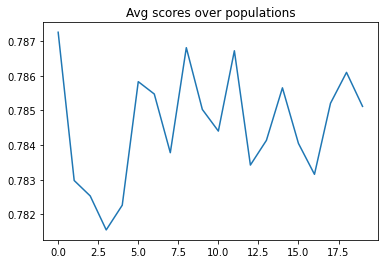

In [89]:
for i in range(0, 20):
    hist_avg_scores[i] = hist_avg_scores[i]/10
print(str(hist_avg_scores))
plt.plot(hist_avg_scores)
plt.title("Avg scores over populations")
plt.show()

Accuracy training: 0.8163992869875223, testing: 0.7593582887700535


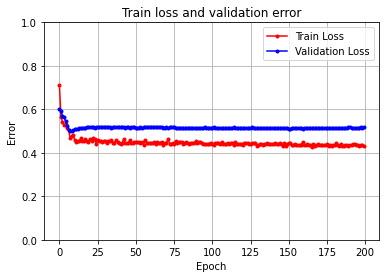

In [90]:
out_model = Sequential()
out_model.add(Dense(max(new_ga.population[9].layers), input_shape=(3,), activation="relu"))
for i in range(0, len(new_ga.population[9].layers)):
    out_model.add(Dense(new_ga.population[9].layers[i], activation=new_ga.population[9].act_fun[i]))
    out_model.add(Dropout(0.2))

out_model.add(Dense(1, activation="sigmoid"))
out_model.compile(optimizer="adam", loss="binary_crossentropy", \
         metrics=["accuracy"])
run_hist = out_model.fit(data_train, target_train, epochs=200,\
                                      validation_data=(data_test, target_test),\
                                      verbose=False, shuffle=False)
print('Accuracy training: %s, testing: %s' % ( \
accuracy_score(target_train, out_model.predict_classes(data_train)), \
accuracy_score(target_test, out_model.predict_classes(data_test))))

plt.plot(run_hist.history["loss"],'r', marker='.', label="Train Loss")
plt.plot(run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
axes = plt.gca()
axes.set_ylim([0,1.0])
plt.title("Train loss and validation error")
plt.legend()
plt.xlabel('Epoch'), plt.ylabel('Error')
plt.grid()

In [192]:
import warnings
from keras.utils.conv_utils import convert_kernel

warnings.filterwarnings('ignore')
class Ind:
    def __init__(self):
        self.layers_weights=[]
        self.layers_bias = []
class WeightGA:
    def __init__(self):
        self.population = []
        self.createPopulation()
        
    def createPopulation(self):
        for i in range(0, 10):
            individual = Ind()
            individual.layers_weights.append(self.createWeights(3, max(new_ga.population[9].layers)))
            individual.layers_bias.append(self.createBiases(max(new_ga.population[9].layers)))
            individual.layers_weights.append(self.createWeights(max(new_ga.population[9].layers), new_ga.population[9].layers[0]))
            individual.layers_bias.append(self.createBiases(new_ga.population[9].layers[0]))
            for i in range(0, len(new_ga.population[9].layers)-1):
                arr = self.createWeights(new_ga.population[9].layers[i], new_ga.population[9].layers[i+1])
                individual.layers_weights.append(arr)
                bias = self.createBiases(new_ga.population[9].layers[i+1])
                individual.layers_bias.append(bias)                                
            individual.layers_weights.append(self.createWeights(new_ga.population[9].layers[len(new_ga.population[9].layers)-1], 1))
            individual.layers_bias.append(self.createBiases(1))
            self.population.append(individual)
        
        
    def new_fitness(self,individual):
        out_model = Sequential()
        out_model.add(Dense(max(new_ga.population[9].layers), input_shape=(3,), activation="relu"))
        for i in range(0, len(new_ga.population[9].layers)):
            out_model.add(Dense(new_ga.population[9].layers[i], activation=new_ga.population[9].act_fun[i]))
            out_model.add(Dropout(0.1))
        out_model.add(Dense(1, activation="sigmoid"))

        out_model.compile(optimizer="adam", loss="binary_crossentropy", \
                         metrics=["accuracy"])
        
        out_model.layers[0].set_weights([individual.layers_weights[0], individual.layers_bias[0]])
        for i in range(1, len(individual.layers_weights)):
            out_model.layers[i*2-1].set_weights([individual.layers_weights[i], individual.layers_bias[i]])
        
        run_hist = out_model.fit(data_train, target_train, epochs=100,\
                                                      validation_data=(data_test, target_test),\
                                                      verbose=False, shuffle=False)
        print('Accuracy training: %s, testing: %s' % ( \
                accuracy_score(target_train, out_model.predict_classes(data_train)), \
                accuracy_score(target_test, out_model.predict_classes(data_test))))
        return accuracy_score(target_test, out_model.predict_classes(data_test))

    def mutatation(self, individual):
        random_layer = random.randint(0, len(individual.layers_weights))
        random_weight = self.createWeights(new_ga.population[9].layers[random_layer], 7)
        random_biases = self.createBiases(new_ga.population[9].layers[random_layer])
        individual.layers[random_layer] = random_neurons
        individual.act_fun[random_layer] = self.act_functions[random_act_fun]
        return individual
    
    def createWeights(self, m,n):
        return np.random.uniform(-1,1,(m,n))
    
    def createWeightsReverse(self, m,n):
        return np.random.uniform(-1,1,(n,m))

    def createBiases(self, n):
        return np.random.uniform(-1,1,n)
    
    def crossWeights(self, father, mother):
        ind = Ind()
        ind2 = Ind()
        
        for i in range(0, len(father.layers_weights)):
            indexStatus = np.random.randint(0, 2)
            if indexStatus == 0:
                ind.layers_weights.append(father.layers_weights[i])
                ind2.layers_weights.append(mother.layers_weights[i])
            else:
                ind.layers_weights.append(mother.layers_weights[i])
                ind2.layers_weights.append(father.layers_weights[i])

            
            indexStatus = np.random.randint(0, 2)
            if indexStatus == 0:
                ind.layers_bias.append(father.layers_bias[i])
                ind2.layers_bias.append(mother.layers_bias[i])
            else:
                ind.layers_bias.append(mother.layers_bias[i])
                ind2.layers_bias.append(father.layers_bias[i])
        for i in range(len(ind.layers_weights)):
            print(father.layers_weights[i].shape)
            print(ind.layers_weights[i].shape)
            print(ind2.layers_weights[i].shape)
        for i in range(len(ind.layers_bias)):
            print(father.layers_bias[i].shape)
            print(ind.layers_bias[i].shape)
            print(ind2.layers_bias[i].shape)
        return_arr = []
        return_arr.append(ind)
        return_arr.append(ind2)

        return return_arr
    
    def mutateWeights(individual, layer):
        'Randomly mutate the weights of an individual'
        individualWeights = individual.get_layer(layer).get_weights()[0]
        randomWeights = createWeights(individualWeights.shape[0], individualWeights.shape[1])

        mutateWeights = np.zeros(individualWeights.shape)
        indexStatus = np.random.randint(2, size=(individualWeights.shape[0],))

        for index in range(individualWeights.shape[0]):
            if indexStatus[index] == 0:
                mutateWeights[index] = individualWeights[index]
            else:
                mutateWeights[index] = randomWeights[index]

        return mutateWeights
        
        individual_bias = individual.get_layer(layer).get_weights()[1]
        random_bias = createBiases(individual_bias.shape[0])

        mutated_bias = np.zeros(individual_bias.shape)
        indexStatus = np.random.randint(2, size=(individual_bias.shape[0],))

        for index in range(individual_bias.shape[0]):
            if indexStatus == 0:
                mutated_bias[index] = individual_bias[index]
            else:
                mutated_bias[index] = random_bias[index]

        return mutated_bias

        

new_weight_ga = WeightGA()
hist_avg_scores = []
for i in range(0, 10):
    scores = []
    print("population: ", str(i))
    for j in range(0, 10):
        scores.append({'num': str(j),'score': new_weight_ga.new_fitness(new_weight_ga.population[j])})
    scores.sort(reverse=True, key=sortFun)
    avg_scores = scores[0]['score'] + scores[1]['score'] + scores[2]['score'] + scores[3]['score'] + scores[4]['score'] + scores[5]['score'] + scores[6]['score'] + scores[7]['score'] + scores[8]['score'] + scores[9]['score']
    print(avg_scores)
    hist_avg_scores.append(avg_scores)
    print(str(scores))
    
    if i<9:
        new_ids = new_weight_ga.crossWeights(new_weight_ga.population[int(scores[0]['num'])], new_weight_ga.population[int(scores[1]['num'])])
        new_ids2 = new_weight_ga.crossWeights(new_weight_ga.population[int(scores[2]['num'])], new_weight_ga.population[int(scores[3]['num'])])
        pop_array = []
        pop_array.append(int(scores[9]['num']))
        pop_array.append(int(scores[8]['num']))
        pop_array.append(int(scores[7]['num']))
        pop_array.append(int(scores[6]['num']))
        pop_array.sort(reverse=True)

        new_weight_ga.population.pop(pop_array[0])
        new_weight_ga.population.pop(pop_array[1])
        new_weight_ga.population.pop(pop_array[2])
        new_weight_ga.population.pop(pop_array[3])
        new_weight_ga.population += new_ids
        new_weight_ga.population += new_ids2

    #if(random.randint(0, 10) == 1):
   #     index = random.randint(0, 10)
    #    new_weight_ga.population[index] = new_weight_ga.mutation(new_weight_ga.population[index])




population:  0
Accuracy training: 0.82174688057041, testing: 0.7433155080213903
Accuracy training: 0.8235294117647058, testing: 0.7486631016042781
Accuracy training: 0.8199643493761141, testing: 0.7754010695187166
Accuracy training: 0.8253119429590018, testing: 0.7647058823529411
Accuracy training: 0.8270944741532977, testing: 0.7540106951871658
Accuracy training: 0.82174688057041, testing: 0.7700534759358288
Accuracy training: 0.82174688057041, testing: 0.7700534759358288
Accuracy training: 0.8146167557932263, testing: 0.7593582887700535
Accuracy training: 0.8253119429590018, testing: 0.7593582887700535
Accuracy training: 0.8181818181818182, testing: 0.7486631016042781
7.593582887700535
[{'num': '2', 'score': 0.7754010695187166}, {'num': '5', 'score': 0.7700534759358288}, {'num': '6', 'score': 0.7700534759358288}, {'num': '3', 'score': 0.7647058823529411}, {'num': '7', 'score': 0.7593582887700535}, {'num': '8', 'score': 0.7593582887700535}, {'num': '4', 'score': 0.7540106951871658}, {

Accuracy training: 0.8181818181818182, testing: 0.7647058823529411
Accuracy training: 0.8163992869875223, testing: 0.7593582887700535
Accuracy training: 0.8199643493761141, testing: 0.7647058823529411
Accuracy training: 0.8199643493761141, testing: 0.7700534759358288
7.684491978609625
[{'num': '0', 'score': 0.7754010695187166}, {'num': '1', 'score': 0.7700534759358288}, {'num': '2', 'score': 0.7700534759358288}, {'num': '3', 'score': 0.7700534759358288}, {'num': '4', 'score': 0.7700534759358288}, {'num': '5', 'score': 0.7700534759358288}, {'num': '9', 'score': 0.7700534759358288}, {'num': '6', 'score': 0.7647058823529411}, {'num': '8', 'score': 0.7647058823529411}, {'num': '7', 'score': 0.7593582887700535}]
(3, 88)
(3, 88)
(3, 88)
(88, 53)
(88, 53)
(88, 53)
(53, 88)
(53, 88)
(53, 88)
(88, 86)
(88, 86)
(88, 86)
(86, 1)
(86, 1)
(86, 1)
(88,)
(88,)
(88,)
(53,)
(53,)
(53,)
(88,)
(88,)
(88,)
(86,)
(86,)
(86,)
(1,)
(1,)
(1,)
(3, 88)
(3, 88)
(3, 88)
(88, 53)
(88, 53)
(88, 53)
(53, 88)
(53, 88

[0.7593582887700535, 0.7636363636363638, 0.7657754010695188, 0.7657754010695188, 0.7668449197860963, 0.7684491978609624, 0.7663101604278074, 0.7657754010695186, 0.7657754010695188, 0.7631016042780748]


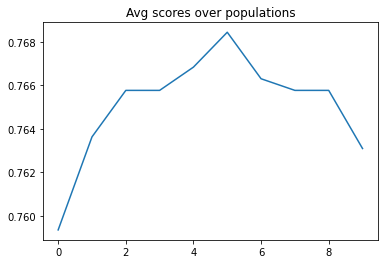

In [193]:
for i in range(0, 10):
    hist_avg_scores[i] = hist_avg_scores[i]/10
print(str(hist_avg_scores))
plt.plot(hist_avg_scores)
plt.title("Avg scores over populations")
plt.show()

Accuracy training: 0.82174688057041, testing: 0.7540106951871658


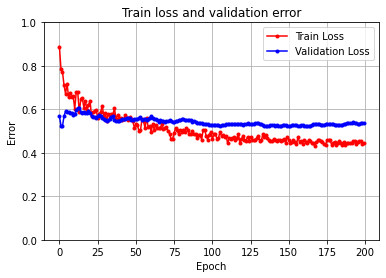

In [200]:
out_model = Sequential()
out_model.add(Dense(max(new_ga.population[9].layers), input_shape=(3,), activation="relu"))
for i in range(0, len(new_ga.population[9].layers)):
    out_model.add(Dense(new_ga.population[9].layers[i], activation=new_ga.population[9].act_fun[i]))
    out_model.add(Dropout(0.2))
out_model.add(Dense(1, activation="sigmoid"))

out_model.compile(optimizer="adam", loss="binary_crossentropy", \
                 metrics=["accuracy"])

out_model.layers[0].set_weights([new_weight_ga.population[1].layers_weights[0], new_weight_ga.population[0].layers_bias[0]])
for i in range(1, len(new_weight_ga.population[0].layers_weights)):
    out_model.layers[i*2-1].set_weights([new_weight_ga.population[0].layers_weights[i], new_weight_ga.population[0].layers_bias[i]])

run_hist = out_model.fit(data_train, target_train, epochs=200,\
                                              validation_data=(data_test, target_test),\
                                              verbose=False, shuffle=False)
print('Accuracy training: %s, testing: %s' % ( \
        accuracy_score(target_train, out_model.predict_classes(data_train)), \
        accuracy_score(target_test, out_model.predict_classes(data_test))))
plt.plot(run_hist.history["loss"],'r', marker='.', label="Train Loss")
plt.plot(run_hist.history["val_loss"],'b', marker='.', label="Validation Loss")
axes = plt.gca()
axes.set_ylim([0,1.0])
plt.title("Train loss and validation error")
plt.legend()
plt.xlabel('Epoch'), plt.ylabel('Error')
plt.grid()